## Clustering Model
our aim is to build up a model that would seperate Retailer X customers base on Income and Total Spending

In [2]:
import numpy as np
import pandas as pd
import types

In [3]:
product_data = pd.read_csv('C:\\Users\\USER\\Documents\\python\\Product Data Set - Student 2 of 3.csv', sep='|')
product_data

,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,30001,HEALTH & BEAUTY,$7.45
1,30002,HEALTH & BEAUTY,$5.35
2,30003,HEALTH & BEAUTY,$5.49
3,30004,HEALTH & BEAUTY,$6.46
4,30005,HEALTH & BEAUTY,$7.33
5,30006,HEALTH & BEAUTY,$6.27
6,30007,HEALTH & BEAUTY,$6.50
7,30008,HEALTH & BEAUTY,$8.95
8,30009,HEALTH & BEAUTY,$6.56
9,30010,APPAREL,$25.27


In [4]:
customer_data = pd.read_csv('C:\\Users\\USER\\Documents\\python\\Customer Data Set - Student 1 of 3.csv')
customer_data

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"$133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married
2,10003,0,40,"$88,610",9,enrolled,02-09-2010,5,Married
3,10004,0,38,"$84,313",8,enrolled,06-04-2015,1,Single
4,10005,0,30,"$51,498",3,notenrolled,NaN,1,Single
...,...,...,...,...,...,...,...,...,...
495,10496,0,47,"$113,125",7,enrolled,23-01-2014,2,Single
496,10497,0,49,"$118,108",7,enrolled,01-10-2007,1,Single
497,10498,0,42,"$97,353",8,enrolled,21-05-2009,5,Married
498,10499,1,22,"$34,424",1,notenrolled,NaN,2,Single


In [5]:
transaction_data = pd.read_csv('C:\\Users\\USER\\Documents\\python\\Transaction Data Set - Student 3 of 3.csv', sep='|')
transaction_data

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT
0,10114,30011,4,0.0,1/2/2015,0
1,10217,30016,3,0.0,1/2/2015,0
2,10224,30013,4,0.0,1/2/2015,0
3,10103,30012,3,0.2,1/2/2015,0
4,10037,30010,8,0.0,1/2/2015,0
...,...,...,...,...,...,...
9995,10154,30024,14,0.0,12/31/2015,0
9996,10090,30003,7,0.1,12/31/2015,0
9997,10212,30004,7,0.0,12/31/2015,0
9998,10102,30006,8,0.2,12/31/2015,0


In [6]:
product_data['UNIT LIST PRICE'] = product_data['UNIT LIST PRICE'].map(lambda x: x.replace('$',''))
product_data['UNIT LIST PRICE'] = product_data['UNIT LIST PRICE'].map(lambda x: float(x))

In [7]:
customer_data['INCOME'] = customer_data['INCOME'].map(lambda x: x.replace('$', ''))
customer_data['INCOME'] = customer_data['INCOME'].map(lambda x: x.replace(',', ''))
customer_data['INCOME'] = customer_data['INCOME'].map(lambda x: int(x))

In [8]:
trans_product = transaction_data.merge(product_data, how="inner", left_on ='PRODUCT NUM', right_on = 'PRODUCT CODE')
trans_product.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,25.46
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,25.46
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,25.46
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,25.46
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,25.46


In [9]:
trans_product['Total Price'] = trans_product['QUANTITY PURCHASED'] * trans_product['UNIT LIST PRICE'] * (1 - trans_product['DISCOUNT TAKEN'])
trans_product.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE,Total Price
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,25.46,101.840
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,25.46,152.760
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,25.46,254.600
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,25.46,305.520
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,25.46,274.968


In [10]:
customer_prod_categ = trans_product.groupby(['CUSTOMER NUM', 'PRODUCT CATEGORY']).agg({'Total Price': 'sum'})
customer_prod_categ

Total Price
CUSTOMER NUM PRODUCT CATEGORY             
10001        APPAREL              4022.430
             ELECTRONICS          1601.315
             FOOD                   68.688
             HEALTH & BEAUTY      1134.337
10002        APPAREL              2312.509
...                                    ...
10498        HEALTH & BEAUTY       320.145
10499        HEALTH & BEAUTY        20.010
10500        APPAREL              1511.748
             ELECTRONICS          2632.269
             FOOD                   38.015

[1427 rows x 1 columns]

In [11]:
customer_prod_categ = customer_prod_categ.reset_index()

In [12]:
customer_pivot = customer_prod_categ.pivot(index = 'CUSTOMER NUM', columns = 'PRODUCT CATEGORY', values= 'Total Price')
customer_pivot

PRODUCT CATEGORY,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY
CUSTOMER NUM,,,,
10001,4022.430,1601.315,68.688,1134.337
10002,2312.509,2473.163,276.779,NaN
10003,2887.382,5414.418,260.640,NaN
10004,3637.213,1840.211,45.270,NaN
10005,213.512,NaN,NaN,NaN
...,...,...,...,...
10496,4611.468,3616.106,186.110,87.780
10497,3404.527,5905.274,420.912,172.945
10498,1723.623,3424.110,783.588,320.145


In [13]:
trans_total_spend = trans_product.groupby('CUSTOMER NUM').agg({'Total Price': 'sum'}).rename(columns= {'Total Price': 'TOTAL SPENT'})
trans_total_spend

,TOTAL SPENT
CUSTOMER NUM,
10001,6826.770
10002,5062.451
10003,8562.440
10004,5522.694
10005,213.512
...,...
10496,8501.464
10497,9903.658
10498,6251.466


In [14]:
customer_KPIs = customer_pivot.merge(trans_total_spend, how = 'inner', left_index = True, right_index= True)
customer_KPIs

,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL SPENT
CUSTOMER NUM,,,,,
10001,4022.430,1601.315,68.688,1134.337,6826.770
10002,2312.509,2473.163,276.779,NaN,5062.451
10003,2887.382,5414.418,260.640,NaN,8562.440
10004,3637.213,1840.211,45.270,NaN,5522.694
10005,213.512,NaN,NaN,NaN,213.512
...,...,...,...,...,...
10496,4611.468,3616.106,186.110,87.780,8501.464
10497,3404.527,5905.274,420.912,172.945,9903.658
10498,1723.623,3424.110,783.588,320.145,6251.466


In [15]:
customer_KPIs = customer_KPIs.fillna(0)

In [16]:
customer_all_view = customer_data.merge(customer_KPIs, how = 'inner', left_on = 'CUSTOMERID', right_index=True)
customer_all_view

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL SPENT
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single,4022.430,1601.315,68.688,1134.337,6826.770
1,10002,0,42,94475,9,notenrolled,NaN,6,Married,2312.509,2473.163,276.779,0.000,5062.451
2,10003,0,40,88610,9,enrolled,02-09-2010,5,Married,2887.382,5414.418,260.640,0.000,8562.440
3,10004,0,38,84313,8,enrolled,06-04-2015,1,Single,3637.213,1840.211,45.270,0.000,5522.694
4,10005,0,30,51498,3,notenrolled,NaN,1,Single,213.512,0.000,0.000,0.000,213.512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,10496,0,47,113125,7,enrolled,23-01-2014,2,Single,4611.468,3616.106,186.110,87.780,8501.464
496,10497,0,49,118108,7,enrolled,01-10-2007,1,Single,3404.527,5905.274,420.912,172.945,9903.658
497,10498,0,42,97353,8,enrolled,21-05-2009,5,Married,1723.623,3424.110,783.588,320.145,6251.466
498,10499,1,22,34424,1,notenrolled,NaN,2,Single,0.000,0.000,0.000,20.010,20.010


## CUSTERING ANALYSIS

In [17]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

### K-Means Clustering Algorithm

In [18]:
cluster_input = customer_all_view[['INCOME', 'TOTAL SPENT']]
cluster_input.head()

,INCOME,TOTAL SPENT
0,133498,6826.770
1,94475,5062.451
2,88610,8562.440
3,84313,5522.694
4,51498,213.512


In [19]:
#we define the number of clusters we want which is 4 in this case
Kmeans_model = KMeans(n_clusters = 4)

In [20]:
#to check the properties of the variable KMeans_model
Kmeans_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
cluster_output = Kmeans_model.fit_predict(cluster_input)

In [22]:
cluster_output

array([3, 2, 2, 2, 1, 3, 2, 0, 0, 2, 1, 0, 2, 2, 1, 2, 2, 0, 3, 1, 0, 0,
       0, 1, 0, 0, 2, 1, 1, 3, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 2, 2,
       3, 1, 1, 2, 3, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0, 3, 0, 3, 2,
       2, 0, 1, 2, 2, 1, 1, 2, 3, 1, 2, 1, 2, 3, 2, 0, 3, 0, 1, 0, 3, 1,
       2, 1, 0, 3, 0, 0, 0, 2, 0, 1, 3, 0, 1, 1, 1, 1, 2, 0, 0, 1, 2, 1,
       1, 1, 2, 1, 0, 1, 3, 3, 2, 2, 1, 2, 0, 1, 2, 2, 0, 2, 1, 3, 2, 2,
       1, 2, 3, 2, 3, 3, 0, 2, 2, 1, 1, 1, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0,
       2, 0, 1, 1, 0, 1, 3, 1, 3, 0, 1, 2, 1, 3, 2, 1, 3, 1, 0, 0, 3, 1,
       3, 3, 0, 1, 3, 1, 2, 1, 0, 3, 0, 0, 1, 3, 1, 0, 0, 3, 0, 3, 0, 3,
       0, 2, 0, 1, 3, 3, 0, 1, 2, 3, 3, 3, 3, 1, 0, 2, 3, 0, 1, 0, 2, 1,
       2, 1, 0, 1, 1, 1, 0, 1, 1, 2, 0, 2, 0, 2, 2, 1, 0, 3, 1, 1, 1, 2,
       2, 2, 2, 1, 0, 0, 3, 1, 2, 0, 1, 0, 1, 2, 1, 3, 0, 0, 1, 3, 1, 2,
       2, 3, 0, 2, 2, 0, 3, 1, 3, 1, 1, 1, 3, 2, 0, 0, 0, 2, 2, 2, 3, 2,
       0, 2, 0, 3, 3, 1, 1, 3, 1, 1, 1, 1, 2, 2, 1,

In [23]:
len(cluster_output[cluster_output == 0])

122

In [24]:
len(cluster_output[cluster_output == 1])

153

In [25]:
type(cluster_output)

numpy.ndarray

In [26]:
product_data.head().values

array([[30001, 'HEALTH & BEAUTY', 7.45],
       [30002, 'HEALTH & BEAUTY', 5.35],
       [30003, 'HEALTH & BEAUTY', 5.49],
       [30004, 'HEALTH & BEAUTY', 6.46],
       [30005, 'HEALTH & BEAUTY', 7.33]], dtype=object)

In [27]:
product_data.head().values[4]

array([30005, 'HEALTH & BEAUTY', 7.33], dtype=object)

In [28]:
product_data.head().values[1,2]

5.35

In [29]:
#converts cluster_output from numpy to pandas
cluster_output_pd = pd.DataFrame(cluster_output, columns= ['segment'])

In [30]:
cluster_output_pd.head()

,segment
0,3
1,2
2,2
3,2
4,1


In [31]:
#same as below
#segment_DF = cluster_input.merge(cluster_output_pd, how ='inner', left_index = True, right_index = True)

In [33]:
#another way of joining cluster_input and cluster_output_pd together
segment_DF = pd.concat([cluster_input, cluster_output_pd], axis=1)

In [34]:
segment_DF.head()

,INCOME,TOTAL SPENT,segment
0,133498,6826.770,3
1,94475,5062.451,2
2,88610,8562.440,2
3,84313,5522.694,2
4,51498,213.512,1


In [35]:
#the code below shows the cluster centriods for the 4 diff clusters we have
Kmeans_model.cluster_centers_

array([[111789.98360656,   7856.9202541 ],
       [ 40510.09803922,   2472.75349673],
       [ 79703.36956522,   5428.75010145],
       [138629.34482759,   6996.87572414]])

In [36]:
#to select only the data  for each cluster we use the code below
segment_DF[segment_DF.segment == 0].head()

,INCOME,TOTAL SPENT,segment
7,115672,8412.001,0
8,101741,9116.576,0
11,101805,293.100,0
17,112035,4242.889,0
20,105964,5957.315,0


In [37]:
len(segment_DF[segment_DF.segment == 0])

122

In [38]:
segment_DF[segment_DF.segment == 1].head()

,INCOME,TOTAL SPENT,segment
4,51498,213.512,1
10,20256,1496.871,1
14,57251,7398.953,1
19,59964,4306.776,1
23,51529,2884.220,1


In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

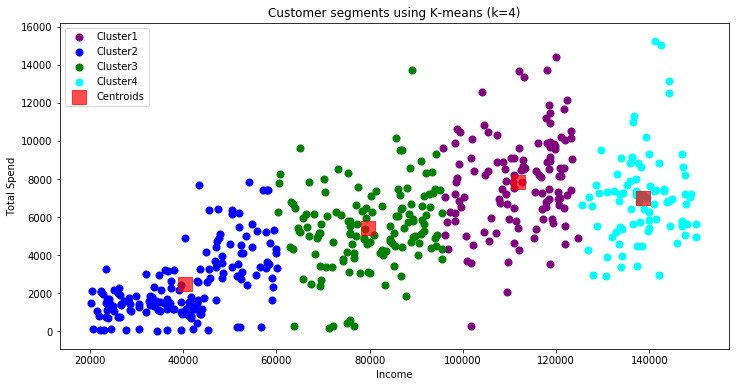

In [40]:
#plot a scatter graph using the filter condition above 
plt.figure(figsize=(12,6))
plt.scatter(segment_DF[segment_DF.segment == 0]['INCOME'], segment_DF[segment_DF.segment == 0]['TOTAL SPENT'], s=50, c='purple', label = 'Cluster1')
plt.scatter(segment_DF[segment_DF.segment == 1]['INCOME'], segment_DF[segment_DF.segment == 1]['TOTAL SPENT'], s=50, c='blue', label = 'Cluster2')
plt.scatter(segment_DF[segment_DF.segment == 2]['INCOME'], segment_DF[segment_DF.segment == 2]['TOTAL SPENT'], s=50, c='green', label = 'Cluster3')
plt.scatter(segment_DF[segment_DF.segment == 3]['INCOME'], segment_DF[segment_DF.segment == 3]['TOTAL SPENT'], s=50, c='cyan', label = 'Cluster4')
#plot the cluster centroids also
plt.scatter(Kmeans_model.cluster_centers_[:,0], Kmeans_model.cluster_centers_[:,1], s= 200, marker = 's', c='red', alpha = 0.7, label = 'Centroids')
plt.title('Customer segments using K-means (k=4)')
plt.xlabel('Income')
plt.ylabel('Total Spend')
plt.legend()
plt.show()

In [41]:
#below is the describtion of the above cluster glaph
list = [[1, 'medium', 'Average'],[2, 'high', 'highest'],[3,'low','low'],[4, 'very high','higher than average']]

In [42]:
details = pd.DataFrame(list, columns = ['cluster', 'Income', 'Total Spend'])
details

,cluster,Income,Total Spend
0,1,medium,Average
1,2,high,highest
2,3,low,low
3,4,very high,higher than average


In [43]:
#we are to check the diff characteristics asssociated with each cluster, to do this we merge the clusters with the customer data
customer_demographics = pd.concat([customer_all_view, cluster_output_pd], axis =1)
customer_demographics.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL SPENT,segment
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single,4022.430,1601.315,68.688,1134.337,6826.770,3
1,10002,0,42,94475,9,notenrolled,NaN,6,Married,2312.509,2473.163,276.779,0.000,5062.451,2
2,10003,0,40,88610,9,enrolled,02-09-2010,5,Married,2887.382,5414.418,260.640,0.000,8562.440,2
3,10004,0,38,84313,8,enrolled,06-04-2015,1,Single,3637.213,1840.211,45.270,0.000,5522.694,2
4,10005,0,30,51498,3,notenrolled,NaN,1,Single,213.512,0.000,0.000,0.000,213.512,1


In [44]:
#we check for the mean Age and median Household size of each cluster group
customer_demographics.groupby('segment').agg({"AGE": 'mean', 'HOUSEHOLD SIZE': 'median'})

,AGE,HOUSEHOLD SIZE
segment,,
0,48.032787,3.0
1,25.104575,2.0
2,36.615942,3.5
3,73.609195,2.0


In [45]:
#we check for %of loyalty enrollment by using the function below
def percent_loyalty(series):
    percent = 100 * series.value_counts()['enrolled']/ series.count()
    return percent

In [46]:
#we pass in the above function in the agg command
cust = customer_demographics.groupby('segment').agg({'AGE': 'mean', 'HOUSEHOLD SIZE': 'median', 'LOYALTY GROUP': percent_loyalty})
cust

,AGE,HOUSEHOLD SIZE,LOYALTY GROUP
segment,,,
0,48.032787,3.0,68.852459
1,25.104575,2.0,50.326797
2,36.615942,3.5,33.333333
3,73.609195,2.0,65.517241


In [47]:
customer_segmentation = pd.concat([details, cust], axis =1)
customer_segmentation

,cluster,Income,Total Spend,AGE,HOUSEHOLD SIZE,LOYALTY GROUP
0,1,medium,Average,48.032787,3.0,68.852459
1,2,high,highest,25.104575,2.0,50.326797
2,3,low,low,36.615942,3.5,33.333333
3,4,very high,higher than average,73.609195,2.0,65.517241


In [48]:
customer_segmentation = customer_segmentation.rename(columns= {'AGE': 'Mean Age', 'HOUSEHOLD SIZE': 'Median household size', 'LOYALTY GROUP': 'Percentage of loyalty enrollment(%)'})

In [49]:
customer_segmentation

,cluster,Income,Total Spend,Mean Age,Median household size,Percentage of loyalty enrollment(%)
0,1,medium,Average,48.032787,3.0,68.852459
1,2,high,highest,25.104575,2.0,50.326797
2,3,low,low,36.615942,3.5,33.333333
3,4,very high,higher than average,73.609195,2.0,65.517241


In [50]:
import decimal
customer_segmentation['Mean Age'] = customer_segmentation['Mean Age'].map(lambda x: round(x))
customer_segmentation['Percentage of loyalty enrollment(%)'] = customer_segmentation['Percentage of loyalty enrollment(%)'].map(lambda x: round(x))

In [51]:
customer_segmentation

,cluster,Income,Total Spend,Mean Age,Median household size,Percentage of loyalty enrollment(%)
0,1,medium,Average,48,3.0,69
1,2,high,highest,25,2.0,50
2,3,low,low,37,3.5,33
3,4,very high,higher than average,74,2.0,66


Above is the Demographic Segmentation for Retailer X customer segments

## Conclusion
After building up the clustering model, we are able to seperate Retailer X customers base on Income, Total Spending, Mean Age, Household size and Loyalty enrollment.